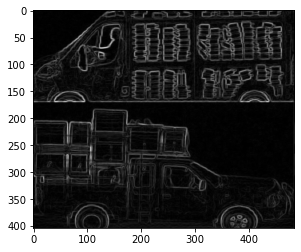

In [2]:

import imageio
import matplotlib.pyplot as plt
import numpy as np
# Project modules
from filters import filters as rt
from filters import normalizers as norm

def printImg(img):
  plt.rcParams['figure.figsize'] = [9, 9]
  plt.imshow(img, cmap="gray")
  plt.show()

filename = 'border_vehicles.png' #str(input())
img = imageio.imread('demo/img/' + filename)

# Handling third dimension of some images
img = img[:, :, 0] if (len(np.shape(img)) == 3) else img

# Applying sharpening filter
img_out = rt.smoothing_filter(img, n=5, sigma=0.5)
img_out = rt.sharpening_filter(img, 2)
img_out = norm.normalize(img_out)

plt.imshow(img_out)

# Saving image
# img_out = img_out.astype(np.uint8)
